<center>
<h style="line-height: 0.5;">

# Applying Machine Learning to Gravitational Lens Modeling
#### **Research Advisor**: Professor Charles Keeton
#### **Research Assistant**: Satyajit Gade

</h>
</center>

In [ ]:
# imports all the modules needed
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import emcee
import corner
import arviz

import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'scripts'))
import pygravlens as gl
from astropy.cosmology import Planck18 as cosmo
from matplotlib.patches import Arc
from pathlib import Path

In [2]:
# Get the repo root directory (one level up from Notebooks)
repo_root = Path.cwd().parent
data_path = repo_root / 'combined_arrays'

scripts_path = repo_root / 'scripts'

sys.path.append(str(scripts_path))

### Shear Only

In [3]:
vals_shear = np.load(data_path / 'valShear.npy', allow_pickle=True)

In [4]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
'''
for i in range(len(vals_shear)):
    print('Here is the image array: \n', vals_shear[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_shear[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_shear[i]["time"], '\n')
    ---
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    ---
    print('----------------------------Next Mock Lens----------------------------')
'''    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase = []
for i in range(len(vals_shear)):
    size = len(vals_shear[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase.append(neither)

typeLens = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens["quad"],'\n')

for j in weirdCase:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

The index array for a single image producing mock lens is:  [8, 186, 294, 695, 1414, 1845, 2126, 2180, 2676, 2868, 3450, 3608, 4086, 4380, 4502, 4668, 4730, 5475, 5727, 6077, 6752, 6909, 7063, 7179, 7331, 7858, 8162, 8672, 8710, 9264, 9346, 9393, 9400, 9661, 10128, 10681, 10963, 11394, 11426, 11514, 11876, 11995, 13034, 13070, 13338, 13549, 14099, 14227, 14667, 14717, 14938, 15545, 16052, 16248, 16318, 16834, 17550, 17658, 17751, 17823, 18361, 18383, 18981, 19439, 19452, 19644, 20058, 20434, 21192, 21343, 21602, 22384, 22613, 22717, 22907, 22983, 23156, 23826, 23848, 23865, 23882, 24049, 24446, 24549, 24698, 24709, 25240, 25316, 26349, 26581, 26679, 26788, 27414, 27491, 27890, 28067, 28659, 29150, 30123, 30155, 30774, 30906, 31247, 31350, 31705, 32137, 32569, 32774, 32811, 32898, 33026, 33295, 33630, 33708, 33767, 33982, 34312, 34383, 34814, 35615, 35739, 36263, 36483, 36967, 37137, 37409, 37629, 37665, 38400, 38626, 38682, 39030, 39241, 39852, 39899, 39955, 40275, 40606, 40665, 41020,

### Ellipticity Only

In [5]:
vals_ellip = np.load(data_path / 'valEllip.npy', allow_pickle = True)

In [6]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
'''
for i in range(len(vals_ellip)):
    print('Here is the image array: \n', vals_ellip[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_ellip[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_ellip[i]["time"], '\n')
    --
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    ---
    print('----------------------------Next Mock Lens----------------------------')
'''
    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase_ellip = []
for i in range(len(vals_ellip)):
    size = len(vals_ellip[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase_ellip.append(neither)

typeLens_ellip = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens_ellip["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens_ellip["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens_ellip["quad"],'\n')

for j in weirdCase_ellip:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

The index array for a single image producing mock lens is:  [7, 12, 49, 66, 84, 133, 156, 174, 179, 186, 208, 245, 294, 318, 378, 386, 407, 409, 412, 419, 426, 443, 449, 472, 500, 528, 560, 586, 607, 616, 645, 666, 681, 682, 683, 695, 699, 728, 729, 758, 767, 810, 812, 816, 840, 858, 903, 919, 934, 980, 994, 1056, 1083, 1098, 1107, 1122, 1127, 1140, 1186, 1211, 1236, 1237, 1247, 1257, 1266, 1290, 1307, 1311, 1318, 1340, 1345, 1351, 1354, 1382, 1386, 1407, 1408, 1417, 1430, 1448, 1453, 1499, 1509, 1517, 1524, 1559, 1578, 1605, 1629, 1643, 1692, 1701, 1712, 1747, 1842, 1845, 1863, 1927, 1950, 1965, 1976, 1978, 2004, 2027, 2031, 2038, 2050, 2054, 2067, 2099, 2126, 2156, 2166, 2175, 2180, 2275, 2276, 2304, 2312, 2330, 2332, 2363, 2386, 2418, 2429, 2447, 2450, 2510, 2523, 2528, 2535, 2554, 2559, 2591, 2593, 2603, 2606, 2655, 2671, 2678, 2699, 2711, 2727, 2733, 2737, 2738, 2739, 2748, 2765, 2785, 2803, 2825, 2848, 2864, 2867, 2957, 2960, 2977, 2980, 3019, 3034, 3070, 3075, 3086, 3095, 3099, 

### Ellipticity & Shear

In [7]:
vals_both = np.load(data_path / 'valBoth.npy', allow_pickle = True)

In [8]:
# printing out specificed dictionary values for img, magnification, and time-delay arrays
'''
for i in range(len(vals_both)):
    print('Here is the image array: \n', vals_both[i]["img"], '\n')
    print('Here is the magnification array: \n', vals_both[i]["mu"], '\n')
    print('Here is the time delay array: \n', vals_both[i]["time"], '\n')
    ---
    print('Here is the ellip_c array: \n', values[i]["ellipc"], '\n')
    print('Here is the ellip_s array: \n', values[i]["ellips"], '\n')
    print('Here is the gamma_c array: \n', values[i]["gammc"], '\n')
    print('Here is the gamma_s array: \n', values[i]["gamms"], '\n')
    print()
    ---
    print('----------------------------Next Mock Lens----------------------------')
'''    
# note that the values dictionary contains i elements where i represents the number of mock lenses

# now we define a separate dictionary containing keys as "single," "double," or "quad" 
# with values as the index of the mock lens for single, double, and quad lenses respectively

single = [];
double = [];
quad = [];

weirdCase_both = []
for i in range(len(vals_both)):
    size = len(vals_both[i]["img"]);
    neither = {}
    if size == 4:
        quad.append(i)
    elif size == 2:
        double.append(i)
    elif size == 1:
        single.append(i)
    else:
        neither = dict(index = i, size = size)
    weirdCase_both.append(neither)

typeLens_both = dict(single = single, double = double, quad = quad)

print("The index array for a single image producing mock lens is: ", typeLens_both["single"],'\n')
print("The index array for a double image producing mock lens is: ", typeLens_both["double"],'\n')
print("The index array for a quad image producing mock lens is: ", typeLens_both["quad"],'\n')

for j in weirdCase_both:
    sz = len(j)
    if sz != 0:
        print("The index for neither single, double, or quad is: ", j["index"],'\n')
        print("And the images produced by this lens are: ", j["size"],'\n')
        print('----------------------------Next Non Single, Double, or Quad Mock Lens----------------------------')

The index array for a single image producing mock lens is:  [2, 8, 12, 13, 14, 60, 66, 84, 96, 108, 114, 122, 156, 174, 179, 186, 208, 245, 261, 264, 294, 318, 378, 386, 400, 409, 412, 419, 426, 443, 449, 472, 477, 483, 497, 500, 528, 529, 560, 580, 586, 616, 627, 641, 645, 654, 665, 666, 675, 681, 682, 683, 695, 699, 728, 747, 749, 758, 767, 809, 810, 812, 816, 843, 858, 865, 890, 893, 898, 903, 919, 934, 980, 994, 1029, 1052, 1064, 1083, 1098, 1103, 1107, 1122, 1123, 1127, 1140, 1184, 1186, 1192, 1211, 1217, 1236, 1242, 1247, 1251, 1257, 1266, 1274, 1290, 1307, 1311, 1318, 1340, 1345, 1351, 1354, 1382, 1386, 1400, 1407, 1408, 1414, 1417, 1430, 1448, 1453, 1499, 1509, 1517, 1518, 1524, 1575, 1578, 1597, 1605, 1610, 1624, 1629, 1632, 1643, 1692, 1701, 1712, 1747, 1788, 1836, 1842, 1845, 1927, 1947, 1950, 1965, 1991, 2029, 2031, 2038, 2050, 2067, 2089, 2093, 2099, 2120, 2126, 2163, 2166, 2175, 2180, 2219, 2276, 2281, 2304, 2312, 2325, 2330, 2363, 2371, 2378, 2386, 2414, 2418, 2429, 2447

In [9]:
print(vals_ellip)

[{'img': array([[ 0.02271699,  2.27375216],
        [ 0.24322107, -0.77262984]]), 'mu': array([ 3.91942241, -0.79075336]), 'time': <Quantity [  0.        , 180.25440495] d>, 'potent': array([3.56110416, 1.23845015]), 'deflec': array([[ 0.16406424,  1.5645404 ],
        [ 0.38456833, -1.48184159]]), 'ellipc': np.float64(-0.12465671540130406), 'ellips': np.float64(-0.22919113661151727), 'gammc': 0.0, 'gamms': 0.0, 'einrad': np.float64(1.3850631500467285), 'zLens': np.float64(0.46420807494162447), 'zSrc': np.float64(1.8411482517226225), 'betaOne': np.float64(-0.14134724831317577), 'betaTwo': np.float64(0.7092117513543641)}
 {'img': array([[ 1.06611479,  2.03429043],
        [-0.25906301, -0.5588476 ]]), 'mu': array([ 2.44322344, -0.82865445]), 'time': <Quantity [  0.        , 102.77789434] d>, 'potent': array([3.34583872, 0.89673125]), 'deflec': array([[ 0.69220252,  1.28195628],
        [-0.63297528, -1.31118174]]), 'ellipc': np.float64(0.027688470255962373), 'ellips': np.float64(-0.1048

In [10]:
print(vals_shear)

[{'img': array([[-0.23700834,  2.25946204],
        [ 0.17079723, -0.68592416]]), 'mu': array([ 2.33191471, -1.18585023]), 'time': <Quantity [  0.        , 172.26069006] d>, 'potent': array([3.3360359 , 0.99466446]), 'deflec': array([[-0.09566109,  1.55025028],
        [ 0.31214449, -1.39513591]]), 'ellipc': 0.0, 'ellips': 0.0, 'gammc': np.float64(-0.07786432761886207), 'gamms': np.float64(0.013445283727088007), 'einrad': np.float64(1.3850631500467285), 'zLens': np.float64(0.46420807494162447), 'zSrc': np.float64(1.8411482517226225), 'betaOne': np.float64(-0.14134724831317577), 'betaTwo': np.float64(0.7092117513543641)}
 {'img': array([[ 1.07949169,  1.98475062],
        [-0.22982862, -0.47467455]]), 'mu': array([ 2.39178471, -0.66979396]), 'time': <Quantity [ 0.        , 98.30314911] d>, 'potent': array([3.13175269, 0.71724651]), 'deflec': array([[ 0.70557943,  1.23241648],
        [-0.60374088, -1.2270087 ]]), 'ellipc': 0.0, 'ellips': 0.0, 'gammc': np.float64(-0.0046576304367253255),

In [11]:

print(vals_both)

[{'img': array([[ 0.09888821,  2.46581161],
        [ 0.29730896, -0.80081772]]), 'mu': array([ 2.72349528, -0.94126753]), 'time': <Quantity [  0.        , 196.36081423] d>, 'potent': array([4.11558659, 1.32134972]), 'deflec': array([[ 0.24023546,  1.75659985],
        [ 0.43865621, -1.51002946]]), 'ellipc': np.float64(-0.12465671540130406), 'ellips': np.float64(-0.22919113661151727), 'gammc': np.float64(-0.07786432761886207), 'gamms': np.float64(0.013445283727088007), 'einrad': np.float64(1.3850631500467285), 'zLens': np.float64(0.46420807494162447), 'zSrc': np.float64(1.8411482517226225), 'betaOne': np.float64(-0.14134724831317577), 'betaTwo': np.float64(0.7092117513543641)}
 {'img': array([[ 1.16566369,  2.06093042],
        [-0.25738227, -0.57863358]]), 'mu': array([ 2.25321233, -0.91693628]), 'time': <Quantity [  0.        , 105.95316224] d>, 'potent': array([3.53519303, 0.92717055]), 'deflec': array([[ 0.79175143,  1.30859627],
        [-0.63129453, -1.33096772]]), 'ellipc': np.f

In [12]:
print(len(vals_both))

100000


In [13]:
# checking for newly added params:

d1 = vals_both[0]["deflec"]
print(d1)

[[ 0.24023546  1.75659985]
 [ 0.43865621 -1.51002946]]


### Neural Network Architecture

In [14]:
from extract_data import extract_single_lens_data, extract_double_lens_data, extract_quad_lens_data
from NetworkModel import create_single_model, create_double_model, create_quad_model
from NetworkModel import train_model_with_roto_translation_singles, train_model_with_roto_translation_doubles, train_model_with_roto_translation_quads
from NetworkModel import train_model
from normalize_test_data import normalize_test_singles, normalize_test_doubles, normalize_test_quads

In [15]:

from sklearn.model_selection import train_test_split

In [ ]:
### Splitting the Dataset:

# One line to split my data
vals_shear_training, vals_shear_testing = train_test_split(
    vals_shear, 
    test_size=0.2,  # 20% for testing
    random_state=42  # For reproducibility
)

# One line to split my data
vals_ellip_training, vals_ellip_testing = train_test_split(
    vals_ellip, 
    test_size=0.2,  # 20% for testing
    random_state=42  # For reproducibility
)

# One line to split my data
vals_both_training, vals_both_testing = train_test_split(
    vals_both, 
    test_size=0.2,  # 20% for testing
    random_state=42  # For reproducibility
)


In [17]:
# Separate data by lens type

# Shear Only
single_shear_train = [s for s in vals_shear_training if s['img'].shape[0] == 1]
double_shear_train = [d for d in vals_shear_training if d['img'].shape[0] == 2]
quad_shear_train = [q for q in vals_shear_training if q['img'].shape[0] == 4]

# Ellip Only
single_ellip_train = [s for s in vals_ellip_training if s['img'].shape[0] == 1]
double_ellip_train = [d for d in vals_ellip_training if d['img'].shape[0] == 2]
quad_ellip_train = [q for q in vals_ellip_training if q['img'].shape[0] == 4]

#both
single_both_train = [s for s in vals_both_training if s['img'].shape[0] == 1]
double_both_train = [d for d in vals_both_training if d['img'].shape[0] == 2]
quad_both_train = [q for q in vals_both_training if q['img'].shape[0] == 4]

##### Shear Only

In [19]:
# Extract data from dictionary for each type 
single_shear_inputs, single_shear_outputs, single_scalers = extract_single_lens_data(single_shear_train)
double_shear_inputs, double_shear_outputs, double_scalers = extract_double_lens_data(double_shear_train)
quad_shear_inputs, quad_shear_outputs, quad_scalers = extract_quad_lens_data(quad_shear_train)


In [20]:
print(f"Shear - Singles: {len(single_shear_inputs)} samples")
print(f"Shear - Doubles: {len(double_shear_inputs)} samples")
print(f"Shear - Quads: {len(quad_shear_inputs)} samples")

print(f"Total: {len(single_shear_inputs) + len(double_shear_inputs) + len(quad_shear_inputs)} samples")

Shear - Singles: 257 samples
Shear - Doubles: 79048 samples
Shear - Quads: 609 samples
Total: 79914 samples


In [21]:
single_shear_model = create_single_model()
double_shear_model = create_double_model()
quad_shear_model = create_quad_model()

In [22]:
history_single_shear = train_model_with_roto_translation_singles(single_shear_model, single_shear_inputs, single_shear_outputs)
history_double_shear = train_model_with_roto_translation_doubles(double_shear_model, double_shear_inputs, double_shear_outputs)
history_quad_shear = train_model_with_roto_translation_quads(quad_shear_model, quad_shear_inputs, quad_shear_outputs)


Applying rotation and translation augmentation for singles (prob=0.3)...
Augmentation complete. Starting training...
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3150 - mae: 0.8691 - val_loss: 1.5598 - val_mae: 0.8545 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2542 - mae: 0.8229 - val_loss: 1.4882 - val_mae: 0.8371 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3899 - mae: 0.8303 - val_loss: 1.4354 - val_mae: 0.8243 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0411 - mae: 0.7397 - val_loss: 1.4008 - val_mae: 0.8136 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9913 - mae: 0.7527 - val_loss: 1.3772 - val_mae: 0.8077 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0267 - mae: 0.7512 - val_loss: 1.3514 - val_mae: 0.8016 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━

In [23]:
# Testing model

single_shear_test = [s for s in vals_shear_testing if s['img'].shape[0] == 1]
double_shear_test = [d for d in vals_shear_testing if d['img'].shape[0] == 2]
quad_shear_test = [q for q in vals_shear_testing if q['img'].shape[0] == 4]

In [24]:
print(f"\nTest set sizes:")
print(f"  Singles: {len(single_shear_test)}")
print(f"  Doubles: {len(double_shear_test)}")
print(f"  Quads: {len(quad_shear_test)}")


Test set sizes:
  Singles: 69
  Doubles: 19761
  Quads: 151


In [25]:
# Normalizing:

x_test_single_shear, y_test_single_shear = normalize_test_singles(
    single_shear_test, 
    single_scalers  # Use scalers from TRAINING data
)

x_test_double_shear, y_test_double_shear = normalize_test_doubles(
    double_shear_test, 
    double_scalers
)

x_test_quad_shear, y_test_quad_shear = normalize_test_quads(
    quad_shear_test, 
    quad_scalers
)

In [38]:
# Evaluate on test data
print("\n" + "="*60)
print("TESTING ON SHEAR DATA")
print("="*60)

if len(x_test_single_shear) > 0:
    single_results = single_shear_model.evaluate(x_test_single_shear, y_test_single_shear, verbose=1)
    print(f"\nSingle Model Test Data")
    print(f"  Test Loss (MSE): {single_results[0]:.6f}")
    print(f"  Test MAE: {single_results[1]:.6f}")

if len(x_test_double_shear) > 0:
    double_results = double_shear_model.evaluate(x_test_double_shear, y_test_double_shear, verbose=1)
    print(f"\nDouble Model Test Data")
    print(f"  Test Loss (MSE): {double_results[0]:.6f}")
    print(f"  Test MAE: {double_results[1]:.6f}")

if len(x_test_quad_shear) > 0:
    quad_results = quad_shear_model.evaluate(x_test_quad_shear, y_test_quad_shear, verbose=1)
    print(f"\nQuad Model Test Data:")
    print(f"  Test Loss (MSE): {quad_results[0]:.6f}")
    print(f"  Test MAE: {quad_results[1]:.6f}")


TESTING ON SHEAR DATA
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5312 - mae: 0.5019 

Single Model Test Data
  Test Loss (MSE): 0.514583
  Test MAE: 0.496799
618/618 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0195 - mae: 0.1016

Double Model Test Data
  Test Loss (MSE): 0.019307
  Test MAE: 0.101091
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2916 - mae: 0.4525 

Quad Model Test Data:
  Test Loss (MSE): 0.292544
  Test MAE: 0.451544


In [40]:
def plot_training_history(history, model_name):
    """Plot training vs validation loss to check for overfitting"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot loss
    axes[0].plot(history.history['loss'], label='Training Loss')
    axes[0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0].set_title(f'{model_name} - Loss vs. Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss (MSE)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot MAE
    axes[1].plot(history.history['mae'], label='Training MAE')
    axes[1].plot(history.history['val_mae'], label='Validation MAE')
    axes[1].set_title(f'{model_name} - MAE vs. Epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('MAE')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate overfitting metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    min_val_loss = min(history.history['val_loss'])
    min_val_epoch = history.history['val_loss'].index(min_val_loss) + 1
    
    print(f"\n=== {model_name} Overfitting Analysis ===")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Best Validation Loss: {min_val_loss:.4f} (epoch {min_val_epoch})")
    
    # Check for overfitting
    if final_val_loss > final_train_loss * 1.2:  # 20% higher
        print("Possible overfitting (val_loss > train_loss)")
        print(f"   Gap: {((final_val_loss - final_train_loss) / final_train_loss) * 100:.1f}%")
    else:
        print("No significant overfitting detected")

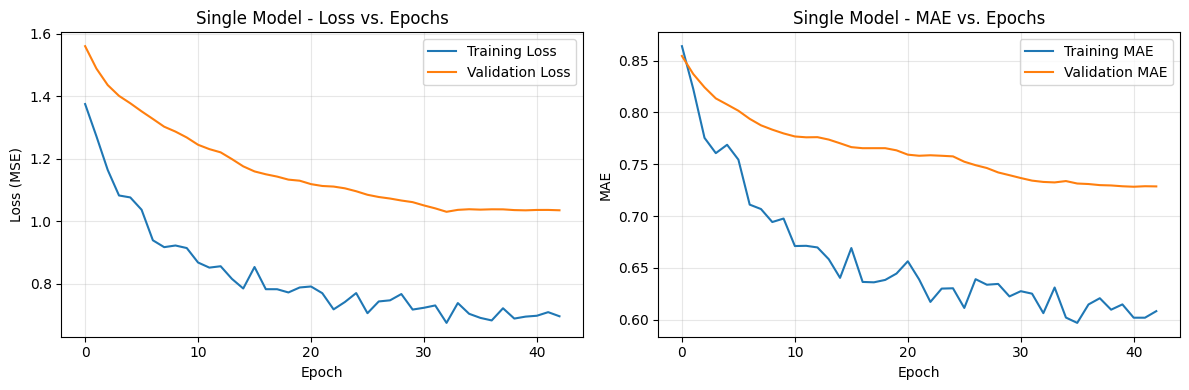


=== Single Model Overfitting Analysis ===
Final Training Loss: 0.6960
Final Validation Loss: 1.0350
Best Validation Loss: 1.0301 (epoch 33)
Possible overfitting (val_loss > train_loss)
   Gap: 48.7%


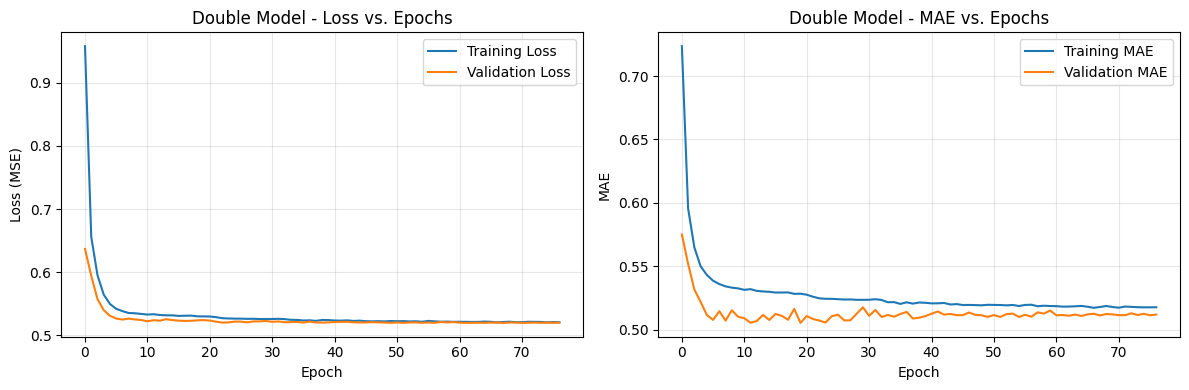


=== Double Model Overfitting Analysis ===
Final Training Loss: 0.5209
Final Validation Loss: 0.5203
Best Validation Loss: 0.5199 (epoch 62)
No significant overfitting detected


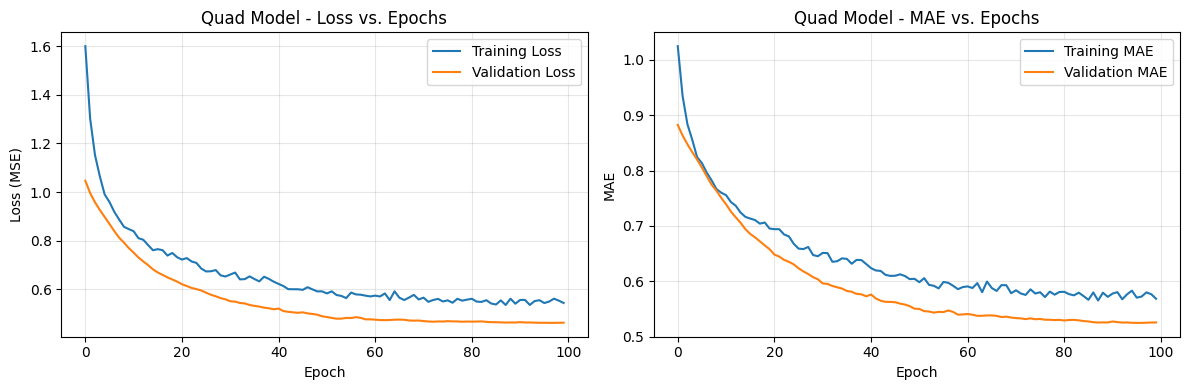


=== Quad Model Overfitting Analysis ===
Final Training Loss: 0.5437
Final Validation Loss: 0.4624
Best Validation Loss: 0.4617 (epoch 97)
No significant overfitting detected


In [41]:
# Plot for each model
plot_training_history(history_single_shear, "Single Model")
plot_training_history(history_double_shear, "Double Model")
plot_training_history(history_quad_shear, "Quad Model")

In [28]:
### No augmentation:

history_double_shear_no_augment = train_model(double_shear_model, double_shear_inputs, double_shear_outputs)

Epoch 1/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1545 - mae: 0.3100 - val_loss: 0.0460 - val_mae: 0.1720 - learning_rate: 1.5625e-05
Epoch 2/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0667 - mae: 0.1999 - val_loss: 0.0230 - val_mae: 0.1122 - learning_rate: 1.5625e-05
Epoch 3/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0549 - mae: 0.1785 - val_loss: 0.0201 - val_mae: 0.1026 - learning_rate: 1.5625e-05
Epoch 4/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0534 - mae: 0.1762 - val_loss: 0.0198 - val_mae: 0.1014 - learning_rate: 1.5625e-05
Epoch 5/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0526 - mae: 0.1746 - val_loss: 0.0199 - val_mae: 0.1019 - learning_rate: 1.5625e-05
Epoch 6/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0523 - mae: 0.1741 - val_loss: 0.0202 - val_mae: 0.1032 - learning_rate: 1.5625e-05
Epoch 7/200
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0526 - mae: 0.1748 - val_loss: 0.0203 - v

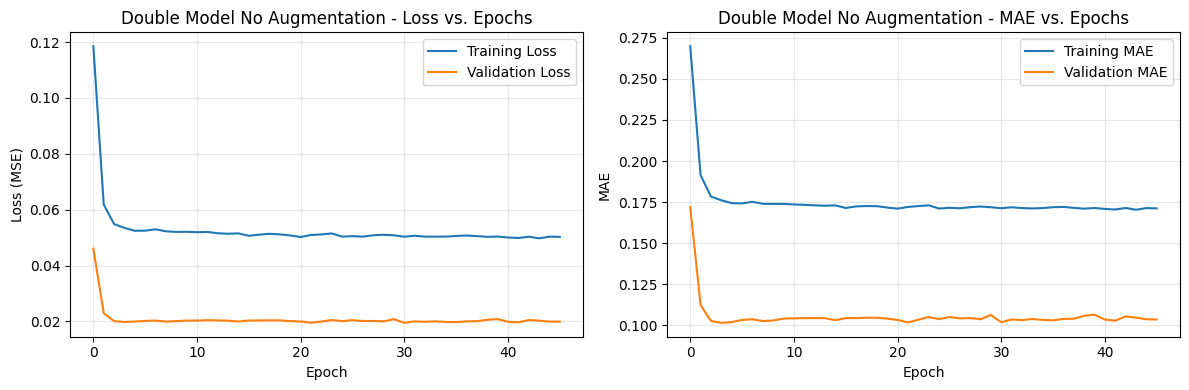


=== Double Model No Augmentation Overfitting Analysis ===
Final Training Loss: 0.0503
Final Validation Loss: 0.0199
Best Validation Loss: 0.0195 (epoch 31)
No significant overfitting detected


In [42]:
# Plot Double Model no Augment
plot_training_history(history_double_shear_no_augment, "Double Model No Augmentation")

In [29]:
'''# Evaluate single model
if len(x_test_single_ellip) > 0:
    single_results = single_shear_model.evaluate(
        x_test_single_ellip, 
        y_test_single_ellip, 
        verbose=1
    )
    print(f"\nSingle Model (trained on shear) → Ellipticity Data:")
    print(f"  Test Loss (MSE): {single_results[0]:.6f}")
    print(f"  Test MAE: {single_results[1]:.6f}")
    print(f"  Number of samples: {len(x_test_single_ellip)}")
else:
    print("No single image ellipticity data to test")


# Evaluate double model
if len(x_test_double_ellip) > 0:
    double_results = double_shear_model.evaluate(
        x_test_double_ellip, 
        y_test_double_ellip, 
        verbose=1
    )
    print(f"\nDouble Model (trained on shear) → Ellipticity Data:")
    print(f"  Test Loss (MSE): {double_results[0]:.6f}")
    print(f"  Test MAE: {double_results[1]:.6f}")
    print(f"  Number of samples: {len(x_test_double_ellip)}")
else:
    print("No double image ellipticity data to test")


# Evaluate quad model
if len(x_test_quad_ellip) > 0:
    quad_results = quad_shear_model.evaluate(
        x_test_quad_ellip, 
        y_test_quad_ellip, 
        verbose=1
    )
    print(f"\nQuad Model (trained on shear) → Ellipticity Data:")
    print(f"  Test Loss (MSE): {quad_results[0]:.6f}")
    print(f"  Test MAE: {quad_results[1]:.6f}")
    print(f"  Number of samples: {len(x_test_quad_ellip)}")
else:
    print("No quad image ellipticity data to test")'''

'# Evaluate single model\nif len(x_test_single_ellip) > 0:\n    single_results = single_shear_model.evaluate(\n        x_test_single_ellip, \n        y_test_single_ellip, \n        verbose=1\n    )\n    print(f"\nSingle Model (trained on shear) → Ellipticity Data:")\n    print(f"  Test Loss (MSE): {single_results[0]:.6f}")\n    print(f"  Test MAE: {single_results[1]:.6f}")\n    print(f"  Number of samples: {len(x_test_single_ellip)}")\nelse:\n    print("No single image ellipticity data to test")\n\n\n# Evaluate double model\nif len(x_test_double_ellip) > 0:\n    double_results = double_shear_model.evaluate(\n        x_test_double_ellip, \n        y_test_double_ellip, \n        verbose=1\n    )\n    print(f"\nDouble Model (trained on shear) → Ellipticity Data:")\n    print(f"  Test Loss (MSE): {double_results[0]:.6f}")\n    print(f"  Test MAE: {double_results[1]:.6f}")\n    print(f"  Number of samples: {len(x_test_double_ellip)}")\nelse:\n    print("No double image ellipticity data to t

##### Ellipticity Only 

In [30]:
'''# Extract data from dictionary for each type 
single_ellip_inputs, single_ellip_outputs, single_ellip_scalers = extract_single_lens_data(single_ellip_data)
double_ellip_inputs, double_ellip_outputs, double_ellip_scalers = extract_double_lens_data(double_ellip_data)
quad_ellip_inputs, quad_ellip_outputs, quad_ellip_scalers = extract_quad_lens_data(quad_ellip_data)'''

'# Extract data from dictionary for each type \nsingle_ellip_inputs, single_ellip_outputs, single_ellip_scalers = extract_single_lens_data(single_ellip_data)\ndouble_ellip_inputs, double_ellip_outputs, double_ellip_scalers = extract_double_lens_data(double_ellip_data)\nquad_ellip_inputs, quad_ellip_outputs, quad_ellip_scalers = extract_quad_lens_data(quad_ellip_data)'

In [31]:
'''print(f"Ellipticity - Singles: {len(single_ellip_inputs)} samples")
print(f"Ellipticity - Doubles: {len(double_ellip_inputs)} samples")
print(f"Ellipticity - Quads: {len(quad_ellip_inputs)} samples")

print(f"Total: {len(single_ellip_inputs) + len(double_ellip_inputs) + len(quad_ellip_inputs)} samples")'''

'print(f"Ellipticity - Singles: {len(single_ellip_inputs)} samples")\nprint(f"Ellipticity - Doubles: {len(double_ellip_inputs)} samples")\nprint(f"Ellipticity - Quads: {len(quad_ellip_inputs)} samples")\n\nprint(f"Total: {len(single_ellip_inputs) + len(double_ellip_inputs) + len(quad_ellip_inputs)} samples")'

##### Both

In [32]:
'''
# Extract data from dictionary for each type 
single_both_inputs, single_both_outputs, single_both_scalers = extract_single_lens_data(single_both_data)
double_both_inputs, double_both_outputs, double_both_scalers = extract_double_lens_data(double_both_data)
quad_both_inputs, quad_both_outputs, quad_both_scalers = extract_quad_lens_data(quad_both_data) '''

'\n# Extract data from dictionary for each type \nsingle_both_inputs, single_both_outputs, single_both_scalers = extract_single_lens_data(single_both_data)\ndouble_both_inputs, double_both_outputs, double_both_scalers = extract_double_lens_data(double_both_data)\nquad_both_inputs, quad_both_outputs, quad_both_scalers = extract_quad_lens_data(quad_both_data) '

In [33]:
'''
print(f"Both - Singles: {len(single_both_inputs)} samples")
print(f"Both - Doubles: {len(double_both_inputs)} samples")
print(f"Both - Quads: {len(quad_both_inputs)} samples")

print(f"Total: {len(single_both_inputs) + len(double_both_inputs) + len(quad_both_inputs)} samples")'''

'\nprint(f"Both - Singles: {len(single_both_inputs)} samples")\nprint(f"Both - Doubles: {len(double_both_inputs)} samples")\nprint(f"Both - Quads: {len(quad_both_inputs)} samples")\n\nprint(f"Total: {len(single_both_inputs) + len(double_both_inputs) + len(quad_both_inputs)} samples")'

In [ ]:
### toy model - shear

num = 10**4

EinsArr = np.random.uniform(1.0, 1.5, num) 

r = np.sqrt(np.random.uniform(0.0, 9.0, num)) # sqrt(9) = 2*1.5 = 3.0
theta_im = np.random.uniform(0, 2*math.pi, num)
im1 = [];
im2 = [];

# accounting for red-shift:
zlens = np.random.uniform(0.2, 0.5, num);
zsrc = np.random.uniform(1.0, 3.0, num);

Dlens = [];
Dsrc = [];

def random_shear(nran,mu=0.05,sg=0.2):
    return np.random.lognormal(mean=np.log10(mu)/np.log10(np.e),sigma=sg/np.log10(np.e),size=nran)

def random_ellip(nran,mu=0.3,sg=0.16,ehi=0.9):
    # note: in order to ensure that we have enough values after truncation, we initially draw extra values
    tmp = np.random.normal(loc=mu,scale=sg,size=2*nran)
    # do the truncation
    tmp = tmp[(tmp>=0)&(tmp<0.9)]
    # return the first nran values from the truncated array
    return tmp[:nran]

shear_vals = random_shear(num)
ellip_vals = random_ellip(num)

# random theta vals

ec = [];
es = [];
gc = [];
gs = [];

theta_e = np.random.uniform(0, 2*math.pi, num)
theta_g = np.random.uniform(0, 2*math.pi, num)

for i in range(num):
    ec.append(ellip_vals[i]*np.cos(2*theta_e[i]))
    es.append(ellip_vals[i]*np.sin(2*theta_e[i]))
    gc.append(shear_vals[i]*np.cos(2*theta_g[i]))
    gs.append(shear_vals[i]*np.sin(2*theta_g[i]))

for i in range(num):
    Dlens.append(cosmo.comoving_distance(zlens[i]));
    Dsrc.append(cosmo.comoving_distance(zsrc[i]));

for i in range(num):
    im1.append(r[i]*np.cos(theta_im[i]));
    im2.append(r[i]*np.sin(theta_im[i]));


for i in range(num):
    plane_elpow = gl.lensplane('ellpow', [0.0, 0.0, 1.0, EinsArr[i], 0.0, 0.0], gammac=gc[i], gammas=gs[i], Dl=Dlens[i])

model_elpow = gl.lensmodel([plane_elpow], Ds=Dsrc[i])
model_elpow.tile()

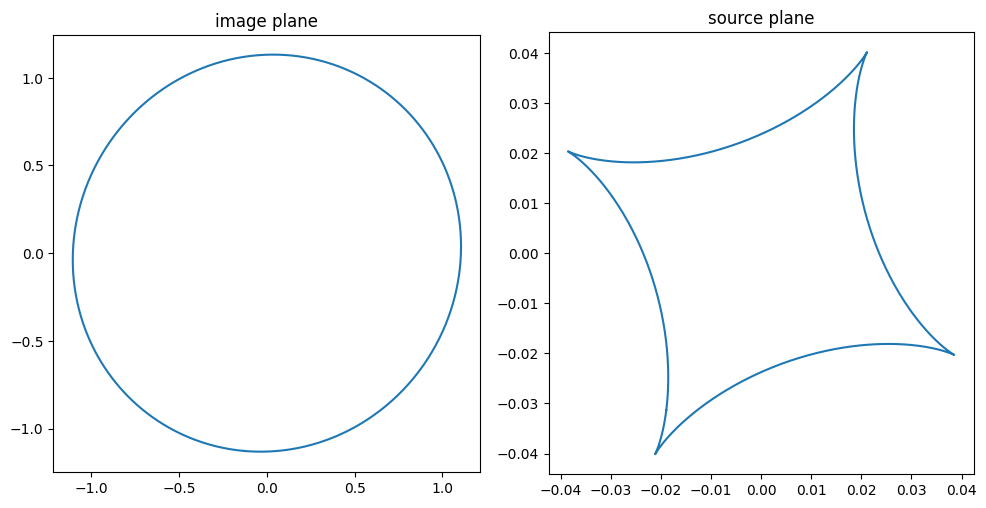

In [9]:
model_elpow.plotcrit()

### list of points on the critical curve
critical_points = model_elpow.crit

### list of points on the caustic curve
caustic_points = model_elpow.caus

In [10]:
print(critical_points)
print(caustic_points)

[array([[-0.1252505 , -1.12779843],
       [-0.13132503, -1.12725451],
       [-0.13527054, -1.12690643],
       ...,
       [-0.10521042, -1.12930573],
       [-0.11523046, -1.12860002],
       [-0.1252505 , -1.12779843]])]
[array([[-0.01892318, -0.03135081],
       [-0.01895224, -0.03157939],
       [-0.0189747 , -0.03175012],
       ...,
       [-0.01882862, -0.03053562],
       [-0.01887468, -0.03094785],
       [-0.01892318, -0.03135081]])]


In [11]:
### use function for the lens equation not the findsrc function.
src = []
mag_tensor = []
time_del = []

for i in range(num):
    src_i, mag_tensor_i, time_del_i = model_elpow.lenseqn([im1[i], im2[i]])
    src.append(src_i)
    mag_tensor.append(mag_tensor_i)
    time_del.append(time_del_i)
    
 
print(src)

[array([ 0.06994912, -0.20293934]), array([-0.02438035,  0.02394447]), array([-0.49043372,  0.79350531]), array([-0.0282028 , -0.62634516]), array([ 0.00844788, -0.01976419]), array([ 0.72632377, -0.41745878]), array([-0.58344545,  0.48361763]), array([-0.95990332, -0.12008324]), array([-0.04883168, -0.04812215]), array([0.04137431, 0.03159974]), array([0.00939967, 0.0476554 ]), array([-0.45787705, -0.15856289]), array([ 0.08957837, -0.02191747]), array([-0.00228032, -0.26688349]), array([-0.2695671 ,  0.04565653]), array([ 0.47093794, -0.55860015]), array([0.28316889, 0.08139067]), array([ 0.1186594 , -0.07753529]), array([ 0.04998484, -0.11599666]), array([0.16000253, 0.06343921]), array([ 0.43063582, -0.92226787]), array([0.08256196, 0.14704151]), array([-0.08885441, -0.07369613]), array([-0.39762488,  0.1563763 ]), array([-0.18988534, -0.08945197]), array([-0.08979987,  0.22558856]), array([-0.03907476,  0.27886839]), array([ 0.21730798, -0.01252227]), array([0.24277134, 0.06513281

Text(0.5, 1.0, 'Graph of Image Positions (SIS+shear)')

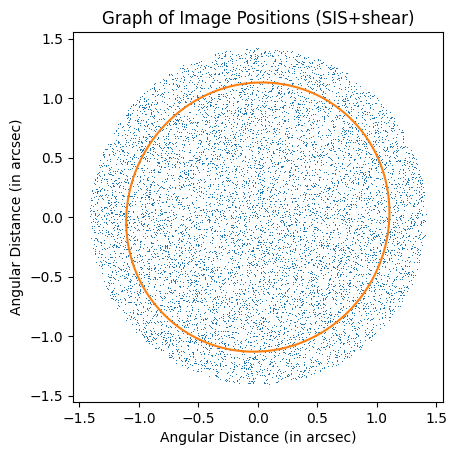

In [12]:
imX = []
imY = []

images = [[im1[i], im2[i]] for i in range(num)]

for elem in images:
    # elem is [x, y] where both are np.float64
    imX.append(float(elem[0]))  # Convert np.float64 to regular float
    imY.append(float(elem[1]))  # Convert np.float64 to regular float

newX = np.array(imX)
newY = np.array(imY)

critical_point = critical_points[0]

crit_x = critical_point[:,0]
crit_y = critical_point[:,1]

plt.plot(newX, newY, ',')
plt.plot(crit_x, crit_y)
plt.gca().set_aspect('equal')
plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Image Positions (SIS+shear)')

Text(0.5, 1.0, 'Graph of Source Positions (SIS+shear)')

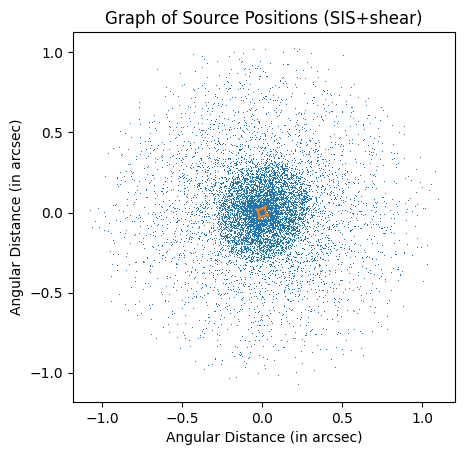

In [ ]:
# the set of images covers the critical curves
# 

betaOne = [src[i][0] for i in range(len(src))]
betaTwo = [src[i][1] for i in range(len(src))]


caustic_point = caustic_points[0]

caus_x = caustic_point[:,0]
caus_y = caustic_point[:,1]

plt.plot(betaOne,betaTwo, ',')
plt.plot(caus_x,caus_y)

plt.gca().set_aspect('equal') 

plt.xlabel('Angular Distance (in arcsec)')
plt.ylabel('Angular Distance (in arcsec)')
plt.title('Graph of Source Positions (SIS+shear)')